<center><img src = 'Trichosurus_caninus_Gould.jpg'></center>
Trichosurus caninus est un marsupial australien qui vit dans les forêts du sud-est du Queensland, de l'est de la Nouvelle-Galles du Sud et de l'est de Victoria.

In [76]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## EDA

- case : numéro d'observation
- site : le numéro du site où l'opossum a été piégé.
- Pop : Population, soit Vic (Victoria) ou autre (Nouvelle-Galles du Sud ou Queensland)
- sex : Genre, soit m (masculin) soit f (féminin)
- age : Âge
- hdlngth : Longueur de la tête, en mm
- skullw : Largeur du crâne, en mm
- totlngth : Longueur totale, en cm
- taill : Longueur de la queue, en cm
- footlgth : longueur du pied
- earconch : longueur de la conque auriculaire
- eye : distance du canthus médial au canthus latéral de l'œil droit
- chest : tour de poitrine, en cm
- belly : tour d'abdomen, en cm

In [77]:
data = pd.read_csv('possum.csv')
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


Il manque deux âges, hors c'est le caractère étudié, je préfère les supprimer au risque de fosser les résultats futurs en remplacer par la valeur moyenne des âges.

In [78]:
data = data.dropna(subset=['age'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      102 non-null    int64  
 1   site      102 non-null    int64  
 2   Pop       102 non-null    object 
 3   sex       102 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   102 non-null    float64
 6   skullw    102 non-null    float64
 7   totlngth  102 non-null    float64
 8   taill     102 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  102 non-null    float64
 11  eye       102 non-null    float64
 12  chest     102 non-null    float64
 13  belly     102 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 12.0+ KB


Il reste une valeur null dans la colonne footlgth, elle va être remplacée par la valeur médiane de la colonne.

In [79]:
from sklearn.impute import SimpleImputer

In [80]:
#data.loc[data.footlgth.isnull(),'footlgth']= data.footlgth.mean()
imputer = SimpleImputer(missing_values=pd.NA, strategy='median')   
data[['footlgth']] = imputer.fit_transform(data[['footlgth']])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      102 non-null    int64  
 1   site      102 non-null    int64  
 2   Pop       102 non-null    object 
 3   sex       102 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   102 non-null    float64
 6   skullw    102 non-null    float64
 7   totlngth  102 non-null    float64
 8   taill     102 non-null    float64
 9   footlgth  102 non-null    float64
 10  earconch  102 non-null    float64
 11  eye       102 non-null    float64
 12  chest     102 non-null    float64
 13  belly     102 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 12.0+ KB


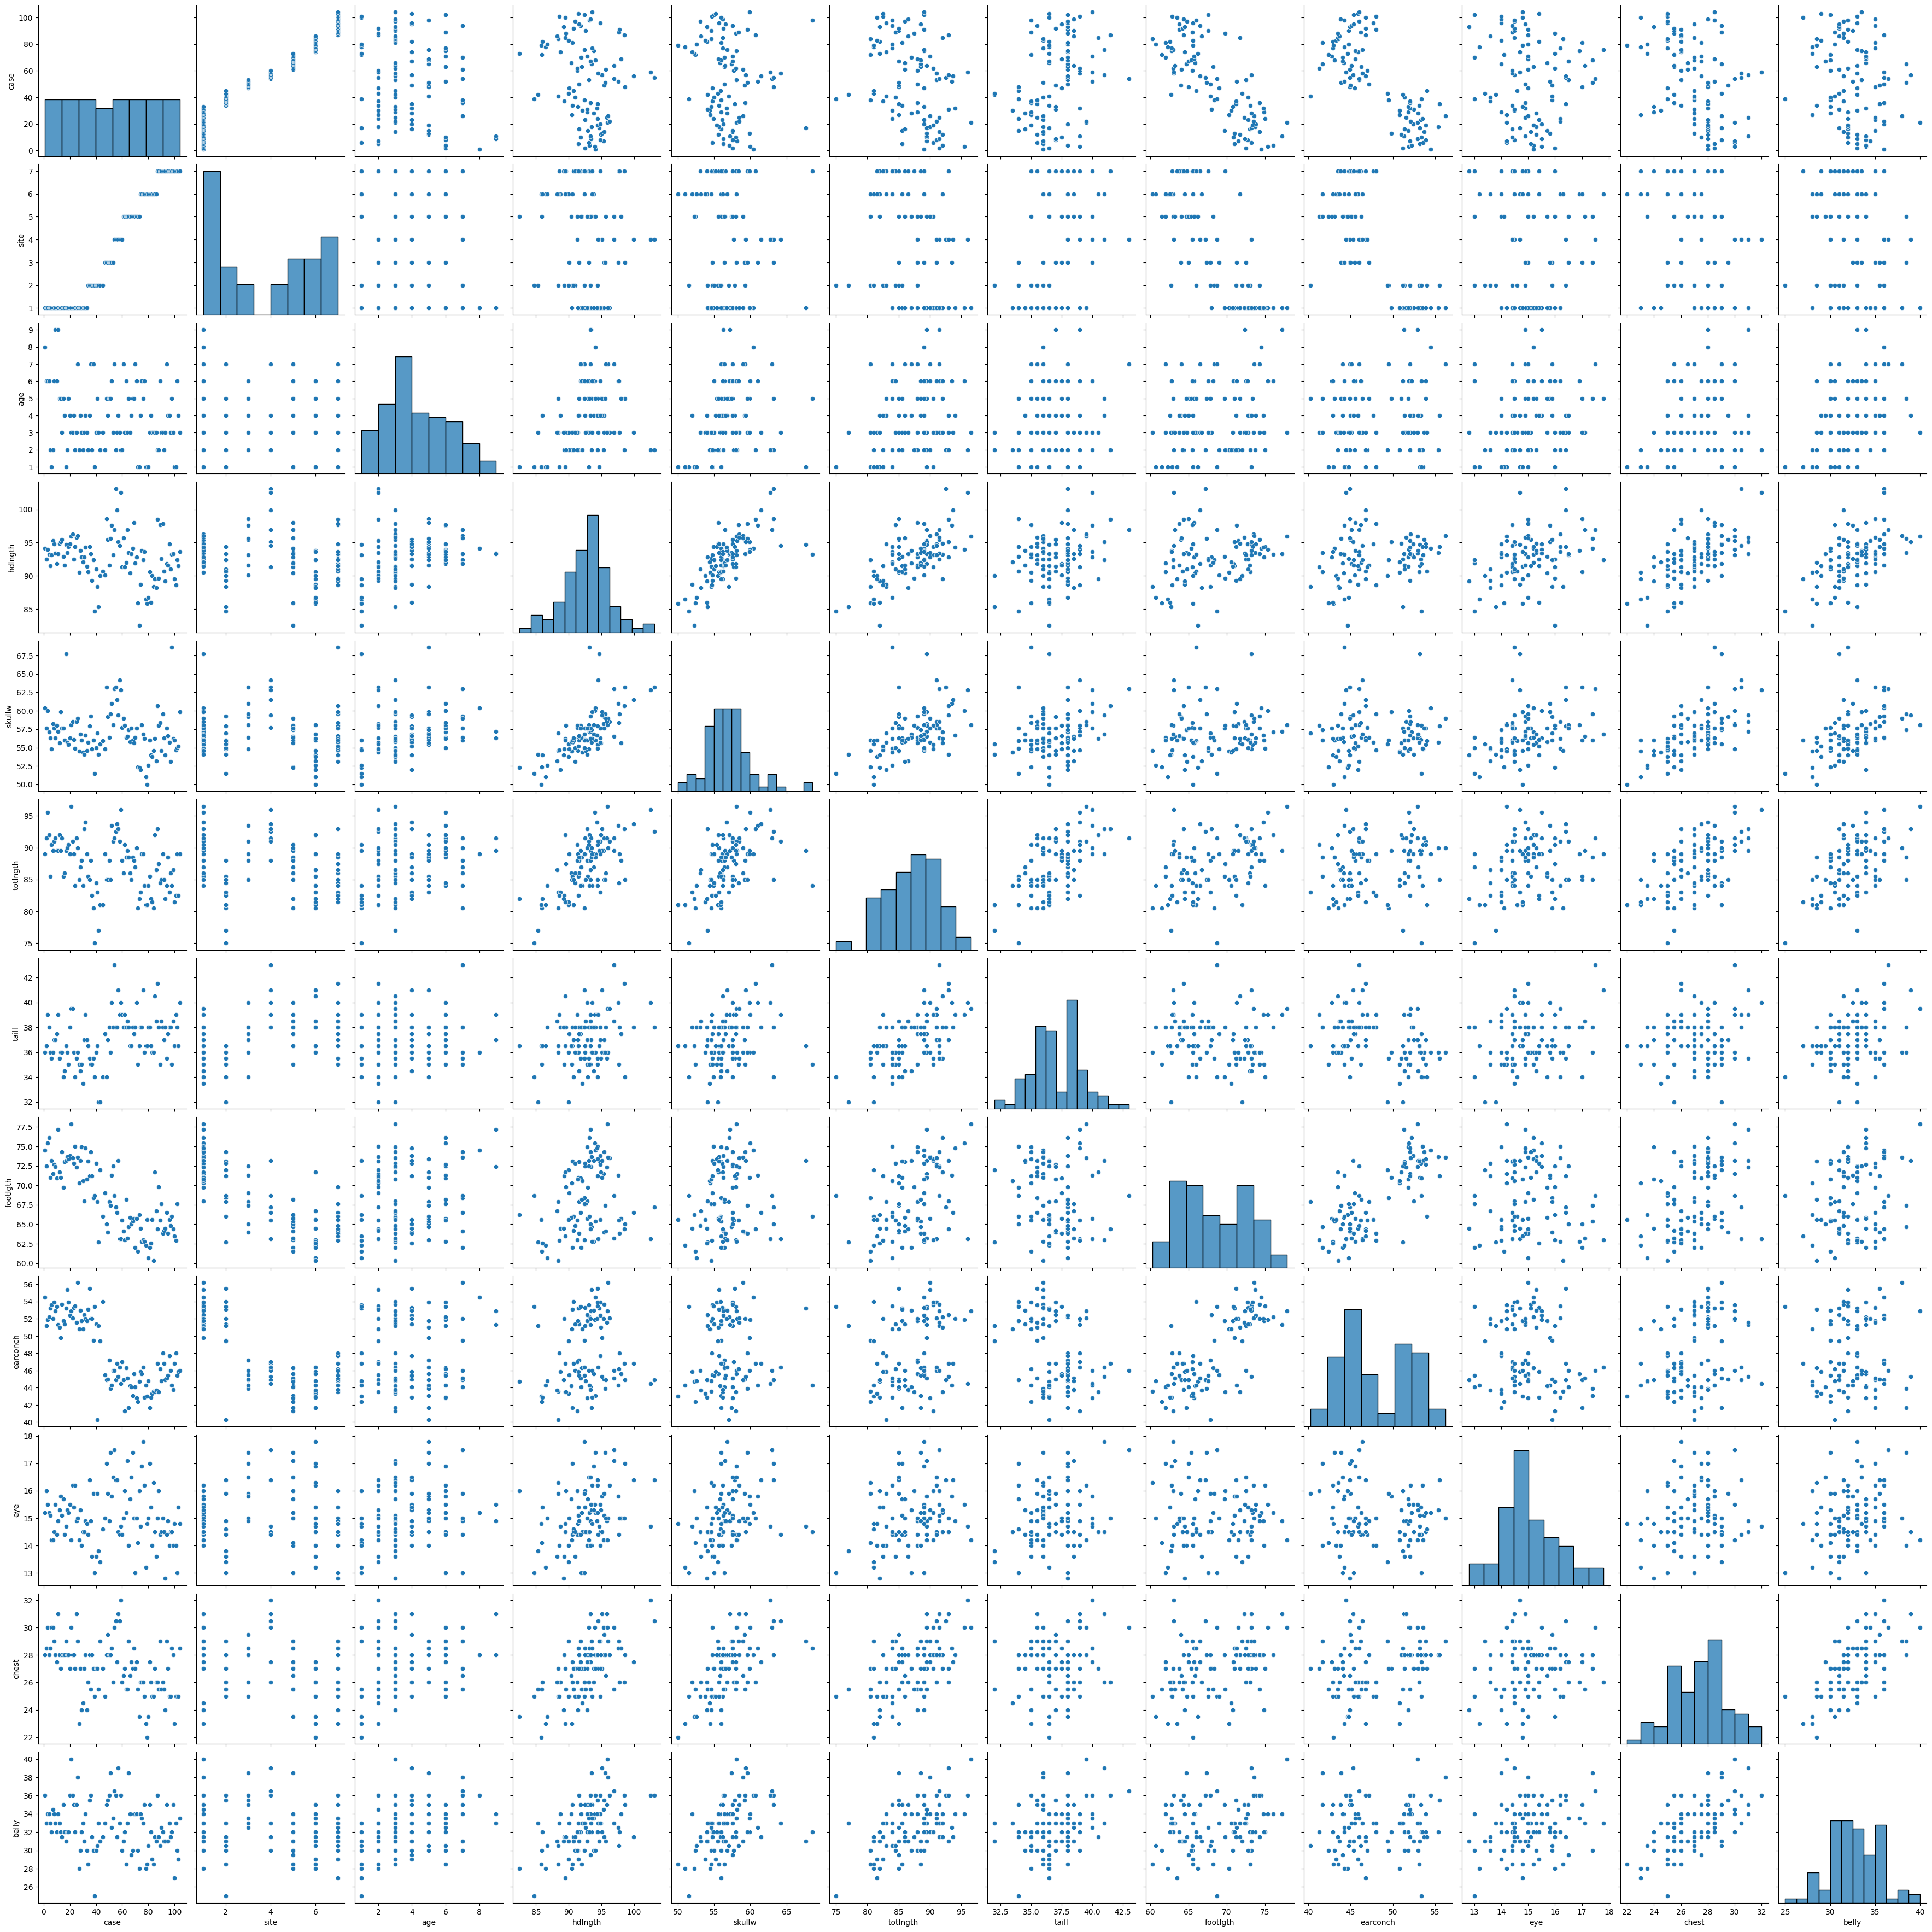

In [91]:
sns.pairplot(data=data, height=3)

Il ne semble pas qu'un caractère soit lié à l'âge ! Les données sont diffuses suivants les neuf tranches d'âge, aucune linéarité ne transparait !

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_7928\531360682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


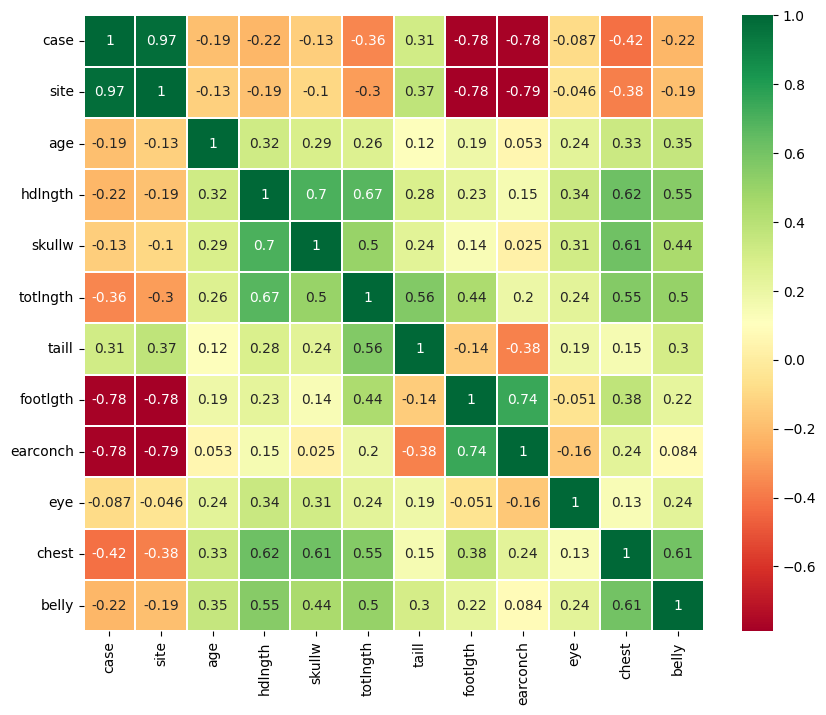

In [92]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)

La correlation la plus forte avec l'âge est à 0.35 avec le caractère belly (tour de poitrine). Pire, les plus fortes correlations se trouvent même avec les sites d'observation !

In [109]:
data_corr = data.corr()['age'][3:]
features_list = data_corr[abs(data_corr) > 0.20].sort_values(ascending=False)
print("Il y a {} séries avec un bon score de correlation de risque de maladie cardiaque:\n{}".format(len(features_list), features_list))

Il y a 6 séries avec un bon score de correlation de risque de maladie cardiaque:
belly       0.354298
chest       0.334209
hdlngth     0.319022
skullw      0.285107
totlngth    0.260280
eye         0.235553
Name: age, dtype: float64


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_7928\4291024656.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()['age'][3:]


Six caractères dépassent une corrélation de 0.2 avec l'âge, sans dépasser 0.35 !

Text(0.5, 1.0, '')

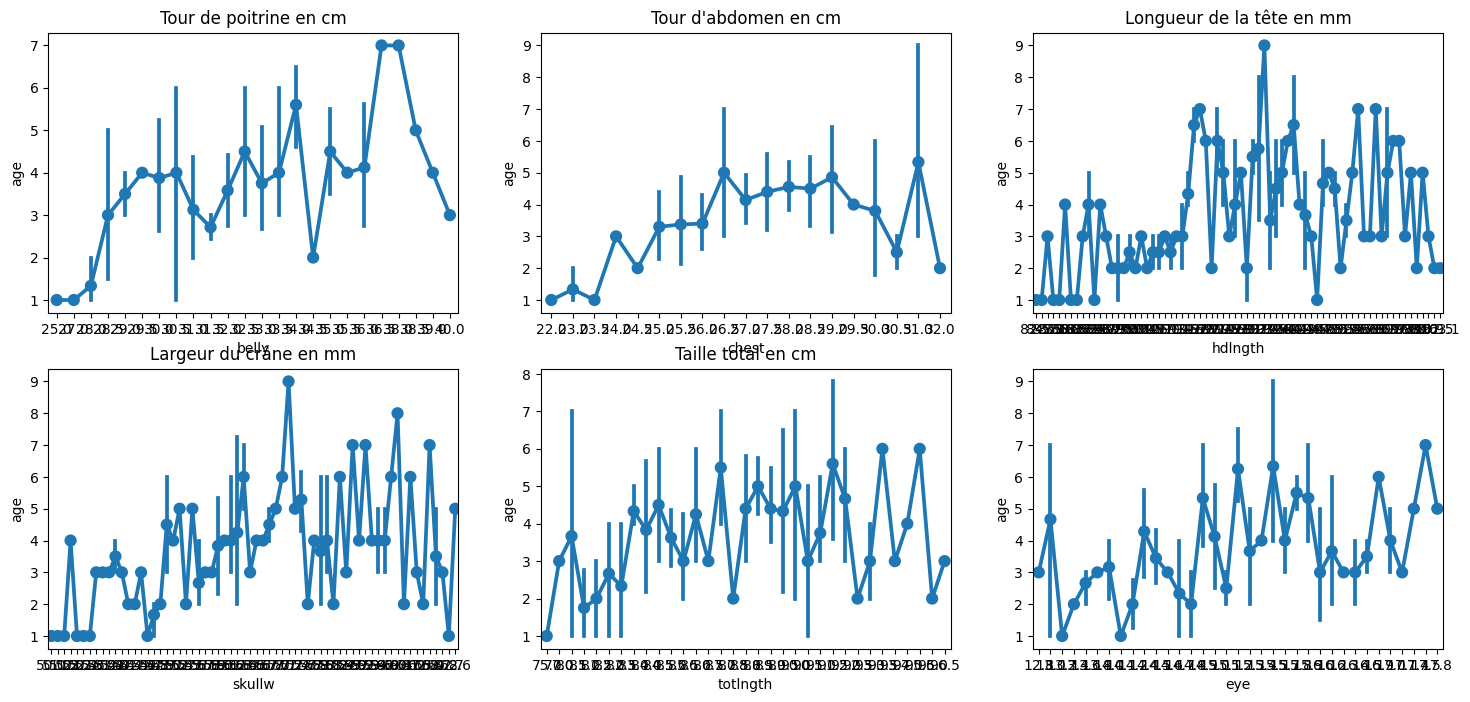

In [53]:
f, ax = plt.subplots(2, 3, figsize=(18, 8))
sns.pointplot(x='belly', y='age', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Tour de poitrine en cm')
sns.pointplot(x='chest', y='age', data=data, ax=ax[0, 1])
ax[0, 1].set_title("Tour d'abdomen en cm")
sns.pointplot(y='age', x='hdlngth', data=data, ax=ax[0, 2])
ax[0, 2].set_title('Longueur de la tête en mm')
sns.pointplot(y='age', x='skullw', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Largeur du crâne en mm')
sns.pointplot(y='age', x='totlngth', data=data, ax=ax[1, 1])
ax[1, 1].set_title("Taille total en cm")
sns.pointplot(y='age', x='eye', data=data, ax=ax[1, 2])
ax[1, 2].set_title("")

Aucun caractère est lié à l'âge de façon linéaire !

Text(0.5, 1.0, 'Distribution par âge')

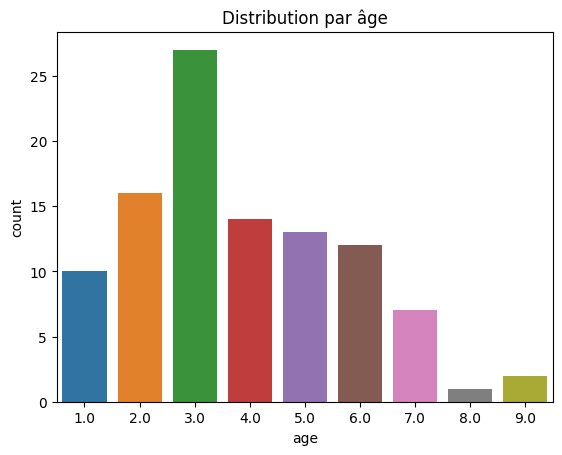

In [96]:
sns.countplot(x='age', data=data)
plt.title('Distribution par âge')

25 % de la population observée est âgée de 3 ans.

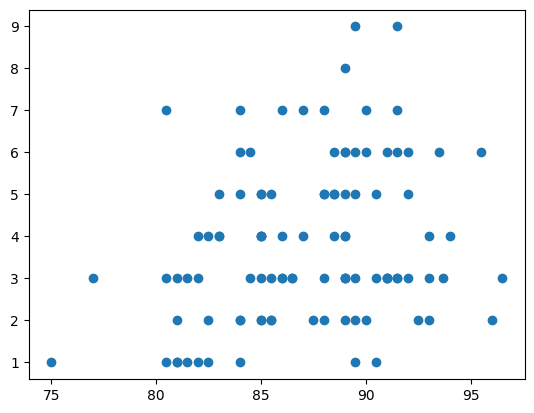

In [35]:
plt.scatter(data.totlngth, data.age)

On peut remarquer que des individus âgés de un an présente une taille équivalente à toutes les catégories d'âges, y compris de ceux de neuf ans !

Text(0.5, 1.0, '')

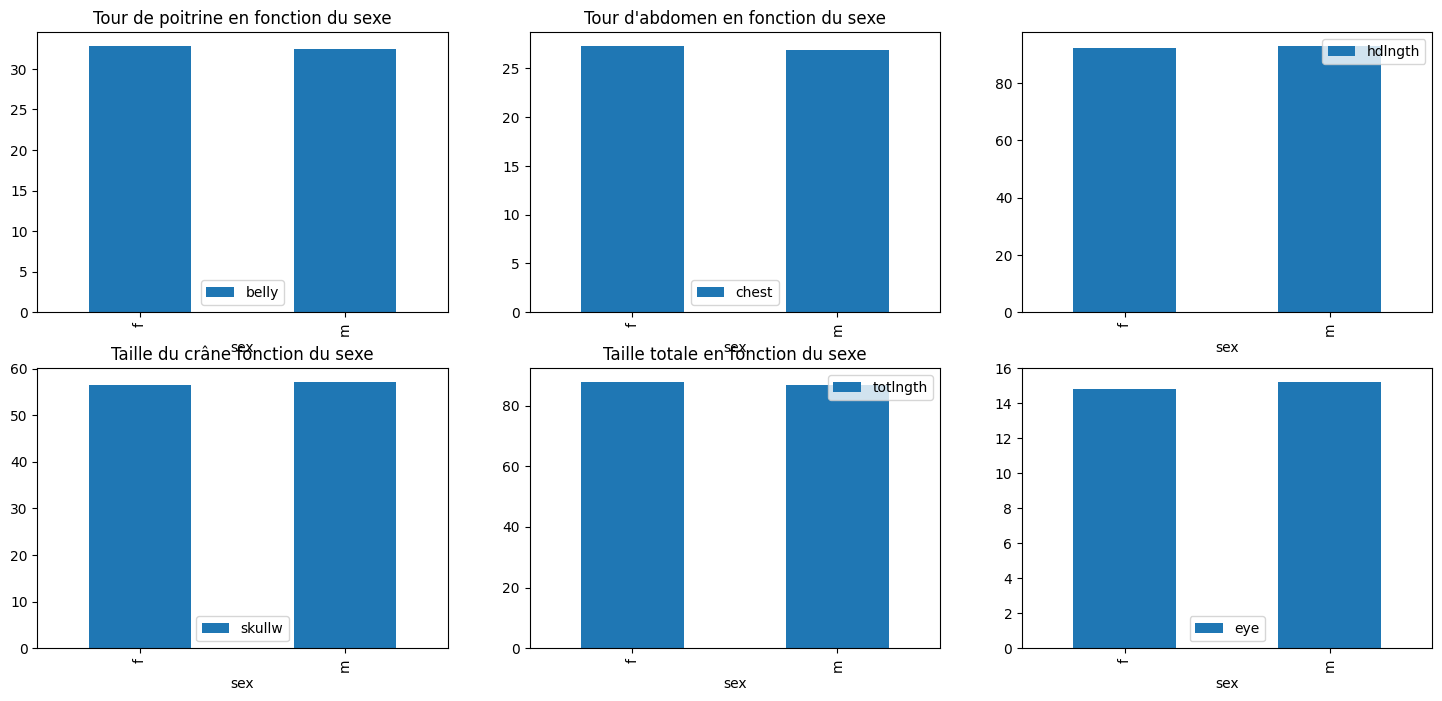

In [95]:
f, ax = plt.subplots(2, 3, figsize=(18, 8))
data[['sex', 'belly']].groupby(['sex']).mean().plot.bar(ax=ax[0,0])
ax[0 , 0].set_title('Tour de poitrine en fonction du sexe')
data[['sex', 'chest']].groupby(['sex']).mean().plot.bar(ax=ax[0,1])
ax[0, 1].set_title("Tour d'abdomen en fonction du sexe")
data[['sex', 'hdlngth']].groupby(['sex']).mean().plot.bar(ax=ax[0,2])
ax[1, 0].set_title('Longueur de la tête en fonction du sexe')
data[['sex', 'skullw']].groupby(['sex']).mean().plot.bar(ax=ax[1,0])
ax[1, 0].set_title('Taille du crâne fonction du sexe')
data[['sex', 'totlngth']].groupby(['sex']).mean().plot.bar(ax=ax[1,1])
ax[1, 1].set_title('Taille totale en fonction du sexe')
data[['sex', 'eye']].groupby(['sex']).mean().plot.bar(ax=ax[1,2])
ax[1, 2].set_title('')

Il n'y a pas de dimorphisme sexuel au sein de l'espèce possum !

Text(0.5, 1.0, '')

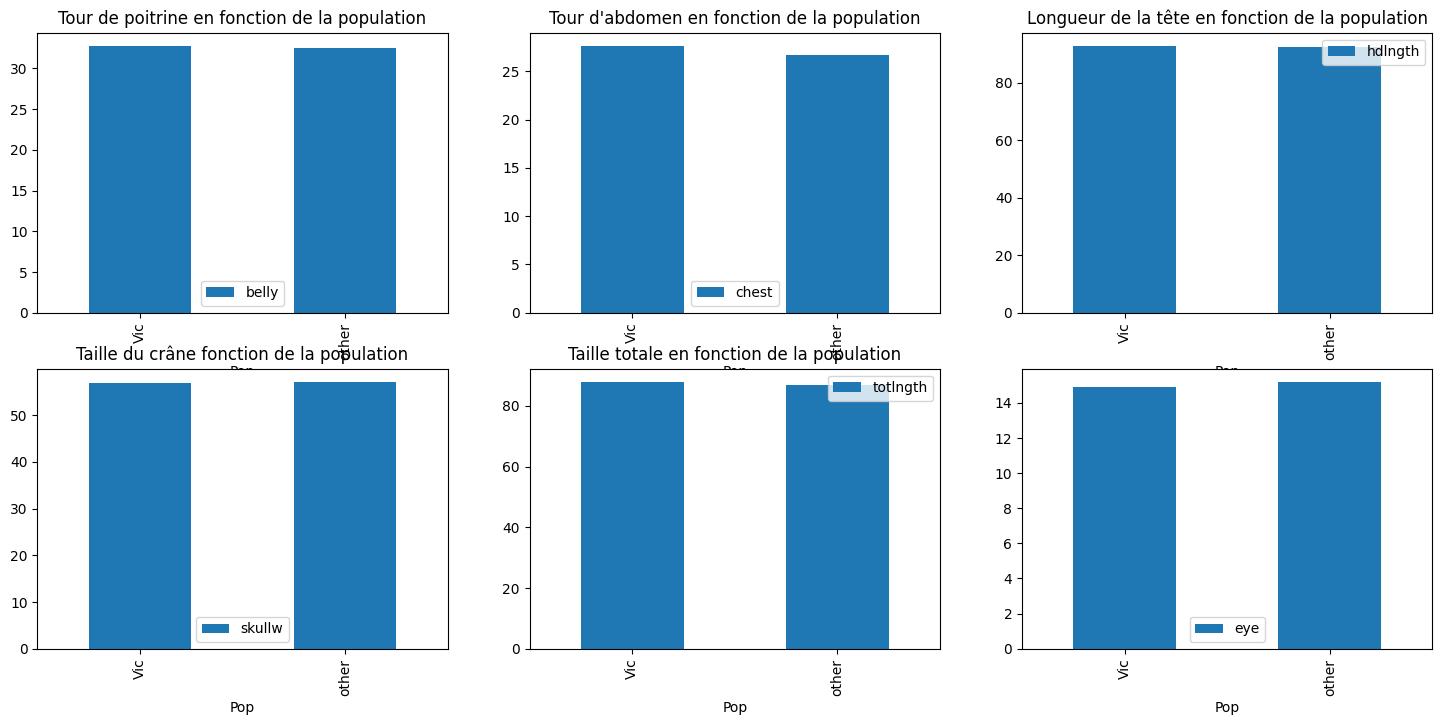

In [10]:
f, ax = plt.subplots(2, 3, figsize=(18, 8))
data[['Pop', 'belly']].groupby(['Pop']).mean().plot.bar(ax=ax[0,0])
ax[0 , 0].set_title('Tour de poitrine en fonction de la population')
data[['Pop', 'chest']].groupby(['Pop']).mean().plot.bar(ax=ax[0,1])
ax[0, 1].set_title("Tour d'abdomen en fonction de la population")
data[['Pop', 'hdlngth']].groupby(['Pop']).mean().plot.bar(ax=ax[0,2])
ax[0, 2].set_title('Longueur de la tête en fonction de la population')
data[['Pop', 'skullw']].groupby(['Pop']).mean().plot.bar(ax=ax[1,0])
ax[1, 0].set_title('Taille du crâne fonction de la population')
data[['Pop', 'totlngth']].groupby(['Pop']).mean().plot.bar(ax=ax[1,1])
ax[1, 1].set_title('Taille totale en fonction de la population')
data[['Pop', 'eye']].groupby(['Pop']).mean().plot.bar(ax=ax[1,2])
ax[1, 2].set_title('')

Aucune différence entre la population de Victoria et les autres !

Text(0.5, 1.0, '')

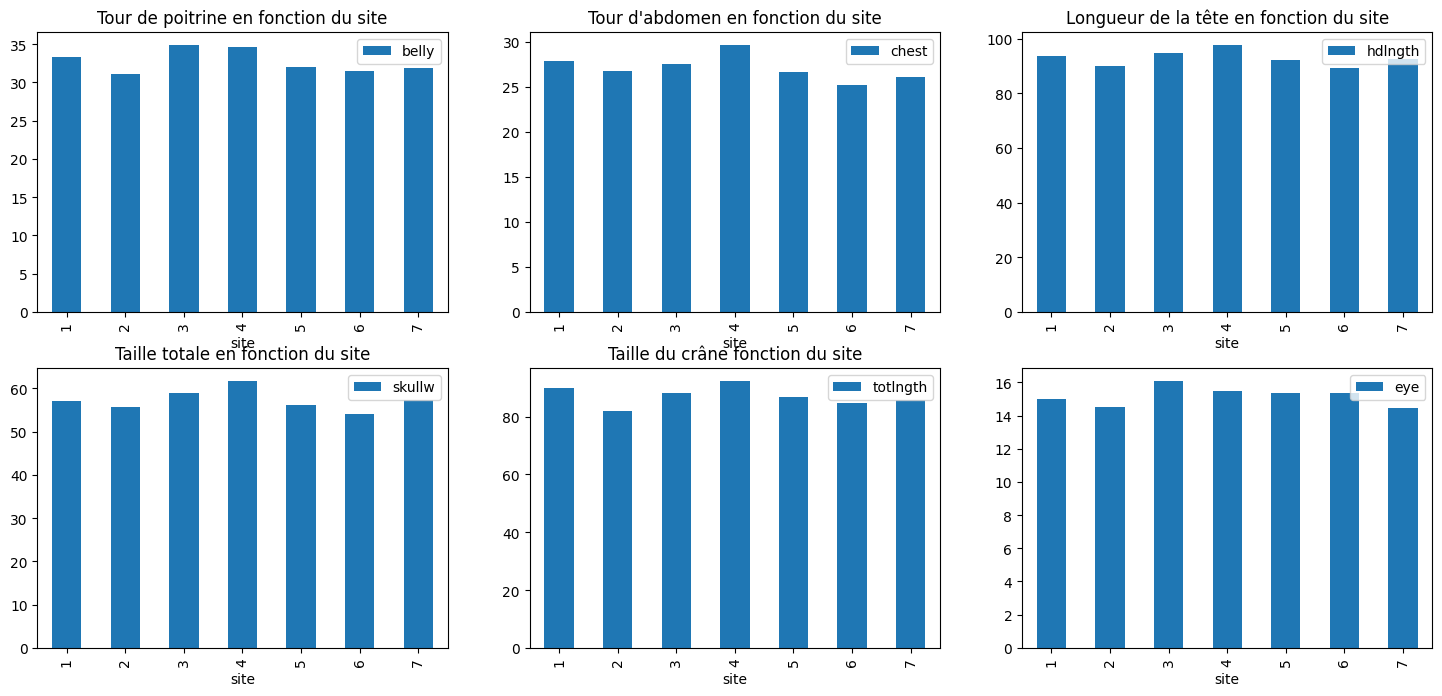

In [45]:
f, ax = plt.subplots(2, 3, figsize=(18, 8))
data[['site', 'belly']].groupby(['site']).mean().plot.bar(ax=ax[0,0])
ax[0 , 0].set_title('Tour de poitrine en fonction du site')
data[['site', 'chest']].groupby(['site']).mean().plot.bar(ax=ax[0,1])
ax[0, 1].set_title("Tour d'abdomen en fonction du site")
data[['site', 'hdlngth']].groupby(['site']).mean().plot.bar(ax=ax[0,2])
ax[0, 2].set_title('Longueur de la tête en fonction du site')
data[['site', 'skullw']].groupby(['site']).mean().plot.bar(ax=ax[1,0])
ax[1, 1].set_title('Taille du crâne fonction du site')
data[['site', 'totlngth']].groupby(['site']).mean().plot.bar(ax=ax[1,1])
ax[1, 0].set_title('Taille totale en fonction du site')
data[['site', 'eye']].groupby(['site']).mean().plot.bar(ax=ax[1,2])
ax[1, 2].set_title('')

Pas de différence majeure entre les différents sites d'observation !

### Conclusion

En conclusion de l'étude des différents caractères, il apparait qu'il n'existe pas de caractère lié à l'âge qui permet de le prédire. Après recherche, les possums atteignent leur maturation sexuelle entre 2 et 3 ans selon le sexe. Cela signifie que leur niveau de croissance est déjà bien avancée à l'âge de 1 an, or c'est à partir de cet âge que les mesures commencent ! (https://archive.wikiwix.com/cache/index2.php?url=http%3A%2F%2Fanimaldiversity.org%2Faccounts%2FTrichosurus_caninus%2F#federation=archive.wikiwix.com&tab=url)

## ML

In [81]:
data_c = data.copy()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
y = data_c['age']
X = data_c.drop(['age', 'site', 'case', 'Pop', 'sex', 'taill', 'footlgth', 'earconch'], axis=1)

### Linear Regression

In [86]:
y_l = y
X_l = X

In [87]:
X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(X_l, y_l, train_size=0.2, random_state=1)

In [88]:
scaler_l = MinMaxScaler()

X_l_train = scaler_l.fit_transform(X_l_train)
X_l_test = scaler_l.transform(X_l_test)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
model = LinearRegression()

In [91]:
model.fit(X_l_train, y_l_train)

LinearRegression()

In [92]:
model.score(X_l_test, y_l_test)

-0.32571450026275994

In [93]:
y_l_predict = model.predict(X_l_test)

print(np.sqrt(mean_squared_error(y_l_test, y_l_predict)))

print(r2_score(y_l_test, y_l_predict))

2.161330479820021
-0.32571450026275994


### Multiple Linear Regression

In [94]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_p_train = poly.fit_transform(X_l_train)

In [96]:
X_p_test = poly.transform(X_l_test)

In [97]:
model_poly = LinearRegression()
model_poly.fit(X_p_train, y_l_train)

LinearRegression()

In [98]:
model_poly.score(X_p_test, y_l_test)

-4.668131530853385

In [99]:
y_p_predict = model_poly.predict(X_p_test)

print(np.sqrt(mean_squared_error(y_l_test, y_p_predict)))

print(r2_score(y_l_test, y_p_predict))

4.469059477962373
-4.668131530853385


### KNeighborsRegressor

In [100]:
y_k = y
X_k = X

In [101]:
X_k_train, X_k_test, y_k_train, y_k_test = train_test_split(X_k, y_k, test_size=0.2, random_state= 1)

In [102]:
scaler_k = MinMaxScaler()
X_k_train = scaler_k.fit_transform(X_k_train)
X_k_test = scaler_k.transform(X_k_test)

In [103]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [104]:
model_k = KNeighborsRegressor()
cv = StratifiedKFold()

In [105]:
param_grid= {'n_neighbors': np.arange(1, 20),
'metric':['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv = cv)
grid.fit(X_k_train, y_k_train)

c:\environnement\.venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [106]:
grid.best_estimator_

KNeighborsRegressor(metric='euclidean', n_neighbors=13)

In [107]:
model_k.fit(X_k_train, y_k_train)

KNeighborsRegressor()

In [108]:
grid.best_params_
model_k = grid.best_estimator_
model_k.score(X_k_test, y_k_test)

-0.1175483529100061

In [109]:
y_k_predict = model_k.predict(X_k_test)

print(np.sqrt(mean_squared_error(y_k_test, y_k_predict)))

print(r2_score(y_k_test, y_k_predict))

1.5417547171248864
-0.1175483529100061


KNeigborRegressor obtient le meilleur résultat avec -0.11 ! Il apparait que les données ne permettent pas déterminer l'âge d'un possum à partir des données physiologique. <br>
Même si le résultat risque de ne pas être probant, je vais tenter de faire une régression uniquement avec les données de comprises entre 1 à 3 ans, puisque les individus atteignent leur maturité sexuelle entre deux et trois ans, ils peuvent encore en phrase de croissance. Bien sûr, même si le model donne un résultat probant, il ne pourra s'appliquer à des individus plus agés !

In [170]:
data_essai = data.copy()
data_essai.drop( data_essai[ data_essai['age'] > 3 ].index, inplace=True)
data_essai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 4 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      53 non-null     int64  
 1   site      53 non-null     int64  
 2   Pop       53 non-null     object 
 3   sex       53 non-null     object 
 4   age       53 non-null     float64
 5   hdlngth   53 non-null     float64
 6   skullw    53 non-null     float64
 7   totlngth  53 non-null     float64
 8   taill     53 non-null     float64
 9   footlgth  53 non-null     float64
 10  earconch  53 non-null     float64
 11  eye       53 non-null     float64
 12  chest     53 non-null     float64
 13  belly     53 non-null     float64
dtypes: float64(10), int64(2), object(2)
memory usage: 6.2+ KB


In [171]:
data_corr = data_essai.corr()['age'][3:]
features_list = data_corr[abs(data_corr) > 0.20].sort_values(ascending=False)
print("Il y a {} séries avec un bon score de correlation de risque de maladie cardiaque:\n{}".format(len(features_list), features_list))

Il y a 6 séries avec un bon score de correlation de risque de maladie cardiaque:
belly       0.400432
totlngth    0.349329
hdlngth     0.341194
chest       0.231789
taill       0.217974
skullw      0.201761
Name: age, dtype: float64


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_12052\2836684361.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data_essai.corr()['age'][3:]


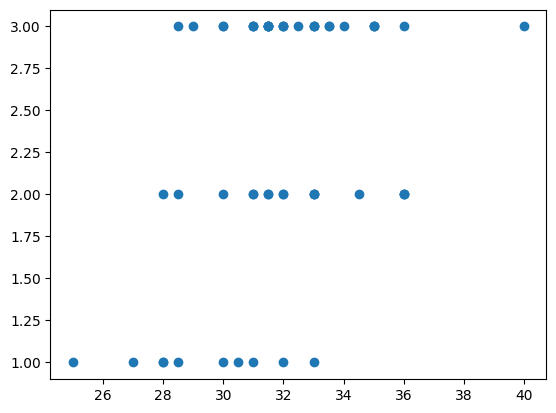

In [172]:
plt.scatter(data_essai.belly, data_essai.age)

In [173]:
y_essai = data_essai['age']
X_essai = data_essai.drop(['age', 'site', 'case', 'Pop', 'sex',  'footlgth', 'earconch', 'eye'], axis=1)

In [174]:
X_essai_train, X_essai_test, y_essai_train, y_essai_test = train_test_split(X_essai, y_essai, test_size=0.2, random_state= 1)

In [175]:
scaler_essai = MinMaxScaler()
X_essai_train = scaler_k.fit_transform(X_essai_train)
X_essai_test = scaler_k.transform(X_essai_test)

In [176]:
model_essai = KNeighborsRegressor()
cv = StratifiedKFold()

In [177]:
param_grid= {'n_neighbors': np.arange(1, 20),
'metric':['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv = cv)
grid.fit(X_essai_train, y_essai_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [178]:
grid.best_estimator_

KNeighborsRegressor(metric='manhattan', n_neighbors=4)

In [179]:
grid.best_params_
model_essai = grid.best_estimator_
model_essai.score(X_essai_test, y_essai_test)

0.22247023809523803

In [180]:
y_essai_predict = model_essai.predict(X_essai_test)

print(np.sqrt(mean_squared_error(y_essai_test, y_essai_predict)))

print(r2_score(y_essai_test, y_essai_predict))

0.7346922670565733
0.22247023809523803


On obtient un résultat de 0.22, le model est toujours inutilisable, mais il s'est tout de même amélioré ! Là encore, il apparait que la grande diversité des morphologies ne permettent pas de créer un model convenable. Il se peut aussi que l'hypothèse considérant l'augmentation de la taille se stoppant autour de trois ans soit fortement erroné. Pour améliorer le model, il faudrait des données plus précises au niveau de l'âge et que les mesures commencent dès leur naissance. Dans tout les cas, les caractères étudiés cesseraient d'évoluer pour un individu donné à partir d'un certain âge ! 